# Names and IDs
 1. Yuval Gorelik 207060914
 2. Nadav Arbel 208391037

# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

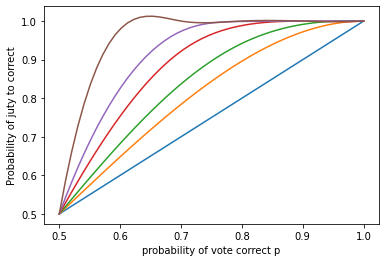

In [55]:
import plotly.express as px
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

#for combinatorics
from scipy import special
#probability of verdict being correct
def create_dataframe(n,p):
    #Create dataframe for a a jury with n members 
    arr = np.array([])
    for i in range(n+1):
        arr = np.append(arr, np.array([n,i]), axis=0)
    arr = arr.reshape(n+1,2)
    df = pd.DataFrame(arr,columns=['Total Jury Members', 'Count of Jury_correct'])
    #Add column to calculate the combination of number of ways of the correct jury can be organized 
    df['No of Ways_correct'] = special.comb(df['Total Jury Members'], df['Count of Jury_correct'])
    #Add column to calculate the probability of the verdict being correct for a single instance
    df['Probability_correct'] = (p**df['Count of Jury_correct'])*((1-p)**(df['Total Jury Members']-df['Count of Jury_correct']))
    #Add column to calculate the total probability of the verdict being correct
    df['Probability x no of ways_correct'] = df['Probability_correct'] * df['No of Ways_correct']
    #Find the value of sum of probabilities of majority being correct
    majority_decision_correct = sum(df[df['Count of Jury_correct']>n/2]['Probability x no of ways_correct'])
    return majority_decision_correct

jury_n = [1,3,5,11,21,101]
list_of_tuples = []
for n in jury_n:
  p_list = []
  majority_list = []
  for i in range(5,11,1):
      p_list.append(i/10)
      majority_list.append(create_dataframe(n,i/10))
    

  X_Y_Spline = make_interp_spline(p_list, majority_list)
  X_ = np.linspace(0.5 , 1.0 , 50)
  Y_ = X_Y_Spline(X_)
  # Plotting the Graph
  plt.plot(X_, Y_)

plt.xlabel("probability of vote correct p")
plt.ylabel("Probability of juty to correct")
plt.show()

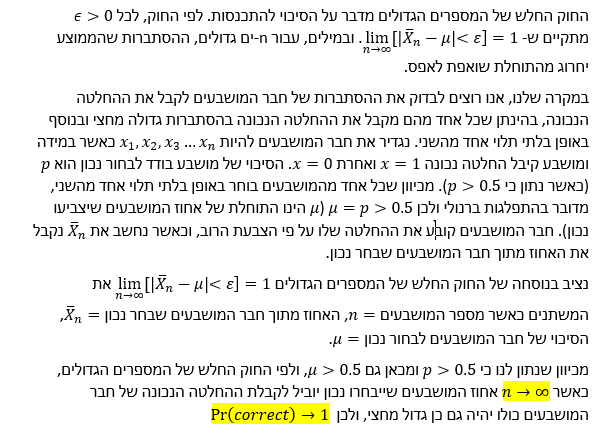

# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

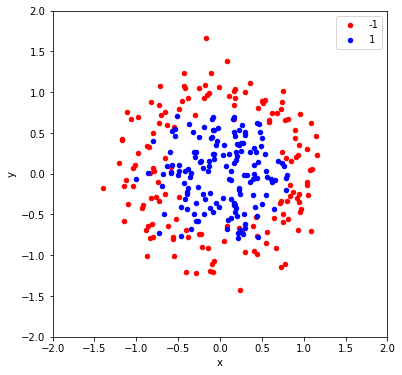

In [56]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [57]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        #Z = h(np.c_[xx.ravel(), yy.ravel()])
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'green', 1:'blue', 0:'red'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


number of estimators: 1
Test Accuracy: 0.48
Accuracy on the train data: 0.51

number of estimators: 3
Test Accuracy: 0.56
Accuracy on the train data: 0.57

number of estimators: 10
Test Accuracy: 0.57
Accuracy on the train data: 0.56

number of estimators: 50
Test Accuracy: 0.67
Accuracy on the train data: 0.76

number of estimators: 100
Test Accuracy: 0.67
Accuracy on the train data: 0.76

number of estimators: 1000
Test Accuracy: 0.67
Accuracy on the train data: 0.76

number of estimators: 10000
Test Accuracy: 0.67
Accuracy on the train data: 0.76



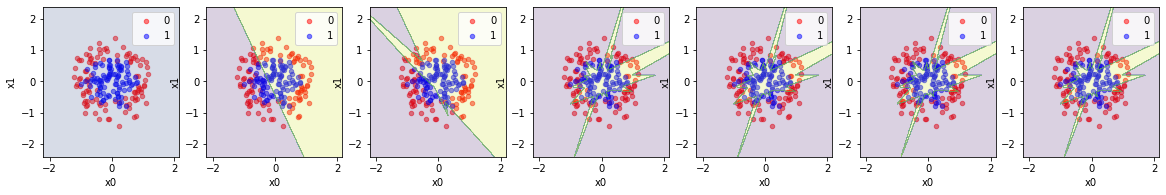

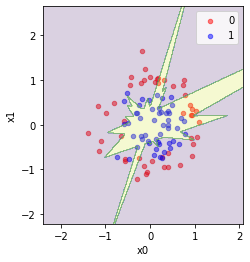

In [63]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.metrics import make_scorer, accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Import train_test_split function
from sklearn.model_selection import train_test_split


X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
# Split dataset into training set and test set
# 2/3 training and 1/3 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 1)

accuracy_test_list = []
accuracy_train_list = []
estimator_errors_list = []
n_estims = [1,3,10,50,100,1000,10000]
models_list = []
for n in n_estims:
  svc = LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000)
  # Create adaboost classifer object
  abc = AdaBoostClassifier(n_estimators=n,
                          learning_rate=1,
                          base_estimator=svc, algorithm='SAMME')
  # Train Adaboost Classifer
  model = abc.fit(X_train, y_train)
  #creating a list that will hold all of the 7 models
  models_list.append(model)
  #Predict the response for test dataset
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  # Model Accuracy, how often is the classifier correct?
  print(f"number of estimators:", n)
  print("Test Accuracy:", accuracy_score(y_test, y_pred))
  accuracy_test_list.append(accuracy_score(y_test, y_pred))
  print("Accuracy on the train data:", accuracy_score(y_train, y_pred_train))
  print('')
  accuracy_train_list.append(accuracy_score(y_train, y_pred_train))
  #print(abc.estimator_errors_ )
  estimator_errors_list.append(abc.estimator_errors_)

fig, ax = plt.subplots(1,7,figsize=(20,20))
for i in range(7):
  #colors = {-1:'red', 1:'blue'}
  plot_data(X_train, y_train, models_list[i].predict , ax[i])

fig, ax1 = plt.subplots(figsize=(4,4))
plot_data(X_test, y_test, models_list[6].predict , ax1)

# Your answers here

**1.** As can be seen in the graph bellow, as the number of estimators increases the model results improve, but up to a certain level so that even if n increases further the model results will not improve further.

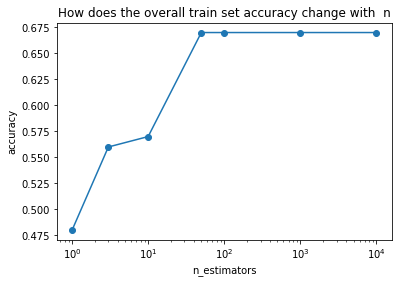

In [59]:
plt.plot(n_estims, accuracy_test_list, '-o')
#plt.plot(n_estims,)
plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('How does the overall train set accuracy change with  n')
plt.show()

**2.** In order to identify whether our model is overfitting, we printed the graph bellow that shows the difference in accuracy between the train data and test data according to the number of weak learners in the model we built. As you can see, our model is not overfitting because if it were we would expect to see the difference between the graphs increase as the number of esimators increases as well. We expected that the model we built would not be overfitting because we used an adaboost model using a large number of simple weak learners who each had a relatively small weight in the final decision. In addition, the model is based on only 2 dimensions, overfitting is more likely to happen in models that contain a high number of dimensions.

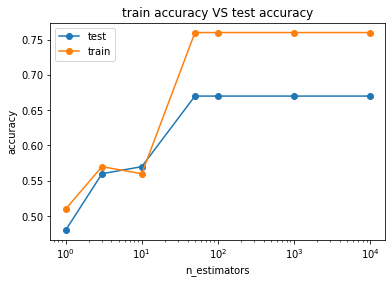

In [60]:
plt.plot(n_estims, accuracy_test_list, '-o', label = 'test')
plt.plot(n_estims, accuracy_train_list, '-o', label = 'train')
plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('train accuracy VS test accuracy')
plt.legend()
plt.show()

**3.** The graph we printed bellow shows the percentage of error in each of the weak estimators in each of the models we ran. As can be seen, the error rate of each weak estimator is the same between the different models, and does not depend on the number of estimators that the model ran. At first, the weak estimators get values between 0.4 and 0.5 but somewhere between the 10 weak estimator and the 50 weak estimator all weak estimators get the value 1 which means that they incorrectly derive all the results, do not contribute to the model and do not help it improve further. We printed the values of the weak estimators when n = 50 to check at which point the weak estimators no longer contribute to the model and we saw that in this specific task, the optimal number of weak estimators is 36.

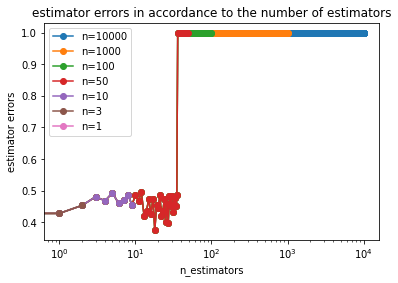

50-estimator errors:  [0.49       0.42797119 0.45343155 0.48061867 0.46799029 0.49320312
 0.46004413 0.46993233 0.48730577 0.45478182 0.4849673  0.46761979
 0.49446115 0.42100488 0.43490869 0.47430626 0.42724549 0.47335382
 0.37485665 0.45586399 0.44375704 0.48653684 0.41870208 0.43437019
 0.47398229 0.40174724 0.45722657 0.39763951 0.48359445 0.45171678
 0.48294134 0.43302831 0.45685657 0.47808718 0.45279822 0.48648575
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [61]:
fig, ax = plt.subplots()
ax.plot(range(10000), estimator_errors_list[6], '-o', label = 'n=10000' )
ax.plot(range(1000), estimator_errors_list[5], '-o', label = 'n=1000')
ax.plot(range(100), estimator_errors_list[4], '-o', label = 'n=100')
ax.plot(range(50), estimator_errors_list[3], '-o', label = 'n=50')
ax.plot(range(10), estimator_errors_list[2], '-o', label = 'n=10')
ax.plot(range(3), estimator_errors_list[1], '-o', label = 'n=3')
ax.plot(range(1), estimator_errors_list[0], '-o', label = 'n=1')

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('estimator errors')
plt.title('estimator errors in accordance to the number of estimators')
plt.legend()
plt.show()

print(f'50-estimator errors: ',estimator_errors_list[3])